# Desafio Data Science - EDS

**Importando Bibliotecas Principais**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Visualização de Dados**

Os dados foram dividos em teste e treino de acordo com as bases de dados fornecidas, sendo o conjunto menor para dados de teste e o conjunto maior para dados de treino, para que o algorítimo tenha mais capacidade de aprendizado. 

In [2]:
df_teste = pd.read_csv('churn-20.csv')  # conjunto de teste
df_treino = pd.read_csv('churn-80.csv') # conjunto de treino

df_treino.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Tratamento de Dados**

In [3]:
acl = pd.crosstab(df_teste['Account length'], df_teste['Churn'])
acl.head(10)

Churn,False,True
Account length,,
1,2,0
3,1,0
6,1,0
7,1,0
10,1,0
12,1,0
13,3,0
15,1,0
16,1,0


In [4]:
#transformação dos dados categóricos de treino em dados numéricos
IP_treino = pd.get_dummies(df_treino['International plan'], drop_first=True)
VMP_treino = pd.get_dummies(df_treino['Voice mail plan'], drop_first=True)

#substituição dos dados categóricos de treino no data frame
df_treino['International plan'] = IP_treino
df_treino['Voice mail plan'] = VMP_treino

df_treino = df_treino.drop(['State','Account length'],axis=1) #comentários 1 e 2

#transformação dos dados categóricos de teste em dados numéricos
IP_teste = pd.get_dummies(df_teste['International plan'],drop_first=True)
VMP_teste = pd.get_dummies(df_teste['Voice mail plan'],drop_first=True)

#substituição dos dados categóricos de treino no data frame
df_teste['International plan'] = IP_teste
df_teste['Voice mail plan'] = VMP_teste

df_teste = df_teste.drop(['State','Account length'],axis=1) #comentários 1 e 2

df_treino.head()

,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


1. Não é possível traçar um padrão entre a variável "Account length" e "Churn", logo pode-se concluir que "Account length" não é uma variável importante para o modelo.

2. A variável "State" pode ser desconsiderada do modelo pois está contida no escopo da variável "Area code". Adicionalmente, como esta variável é categórica e de comprimento longo (51), substituí-la por um dummy acarretaria no acréscimo de 51 linhas no banco de dados. Assim, foi mais útil considerar a variável "Area code".

**Importando Bibliotecas de Machine Learning**

In [5]:
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.ensemble import RandomForestClassifier #Random Forests
from sklearn.metrics import confusion_matrix, classification_report

**Divisão dos conjuntos de Teste e Treino**

In [8]:
#conjunto de treino
X_train = df_treino.drop('Churn', axis=1) #features
y_train = df_treino['Churn']              #label

#conjunto de teste
X_test = df_teste.drop('Churn', axis=1) #features
y_test = df_teste['Churn']              #label

**Logistic Regression**

In [9]:
#treinando o modelo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg_pred = logreg.predict(X_test) #previsão

#relatório do modelo
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

       False       0.87      0.98      0.92       572
        True       0.47      0.08      0.14        95

    accuracy                           0.86       667
   macro avg       0.67      0.53      0.53       667
weighted avg       0.81      0.86      0.81       667



C:\Users\Adel\Documents\Nova pasta\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Random Forests**

In [15]:
#treinando o modelo
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test) #previsão

#relatório do modelo
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       572
        True       0.96      0.72      0.82        95

    accuracy                           0.96       667
   macro avg       0.96      0.86      0.90       667
weighted avg       0.96      0.96      0.95       667



Ambos os modelos utilizam os dados de treino para definir uma probabilidade padrão que será aplicada nos dados de teste. Assim, ambos testam esta probabilidade nos bancos de teste e verificam se, para cada cliente, a probabilidade estimada é maior ou menor do que o padrão definido durante o treino. Caso essa probabilidade seja maior, o teste retorna o resultado "False" (não há probabilidade de "Churn"), caso menor, o teste retorna o resultado "True" (há probabilidade de "Churn").

Para comparação, foram utilizados dois modelos: Logistic Regression e Random Forest. O primeiro foi escolhido por ser o mais apropriado para o cálculo de probabilidades nas quais a variável de interesse possui apenas duas opções (True e False). Já o segundo, foi escolhido devido à grande quantidade de ramificações dos dados (e.g. ligações por dia/tarde/noite), sendo o mais apropriado para esse tipo de análise.

A partir da análise dos resultados, pode-se verificar que o "Random Forest" se mostrou mais propício para o desenvolvimento do modelo requerido. Isto pode ser inferido a partir da comparação da acurácia e da precisão dos dois modelos, onde o RFC é superior em ambos os casos. Analogamente, pode-se avaliar as matrizes de confusão (figuras 1 e 2) que indicam que há muito mais erros de predição no modelo de Logistic Regression (ex.: 87 falsos positivos) comparado a Random Forests (ex.: 27 falsos positivos), o que torna RFC um modelo mais confiável.

Também é válido salientar que para uma solução mais sofisiticada e com melhor performance para este tipo de problema de classificação, podem ser utilizadas Redes Neurais, que são modelos mais complexos com capacidade de utilização de uma quantidade grande de parâmetros.

**Visualização dos Resultados: Matriz de Confusão**

Logistic Regression (Figura 1)

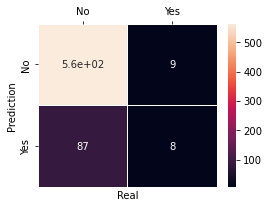

In [21]:
#visualizando os resultados
cm = confusion_matrix(y_test,logreg_pred)
df_cm = pd.DataFrame(cm, columns = ['No', 'Yes'], index = ['No', 'Yes'])

plt.figure(figsize = (4, 3))
ax = sns.heatmap(df_cm, annot = True, linewidth = 0.5)
ax.set(ylabel = 'Prediction', xlabel = 'Real')
ax.xaxis.tick_top()

Random Forest (Figura 2)

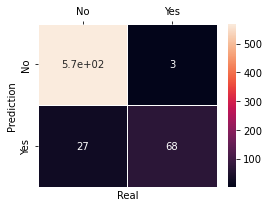

In [20]:
#visualizando os resultados
cm = confusion_matrix(y_test,rfc_pred)
df_cm = pd.DataFrame(cm, columns = ['No', 'Yes'], index = ['No', 'Yes'])

plt.figure(figsize = (4, 3))
ax = sns.heatmap(df_cm, annot = True, linewidth = 0.5)
ax.set(ylabel = 'Prediction', xlabel = 'Real')
ax.xaxis.tick_top()